<a href="https://colab.research.google.com/github/SzymonLabedziewski/Metody-Inteligencji-Obliczeniowej/blob/main/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#**1.1**
**Proszę pobrać zbiór fasion MNIST (torchvision.datasets.FashionMNIST) i zaproponować sieć konwolucyjną do jego klasyfikacji.**

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# najczęściej tworzymy sieci neuronowe dziedzicząc je po klasie nn.Module. Zawiera ona wszystkie potrzebne funkcje do tworzenia uczenia sieci neuronowej.
class CNNFashionMNIST(nn.Module):
    def __init__(self):
        super(CNNFashionMNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# tworzymy obiekt klasy TorchModel podając ilość cech wejściowych
# Inicjalizacja modelu
model = CNNFashionMNIST()

# Definicja funkcji kosztu i optymalizatora
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.14MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 52.3MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.3MB/s]


In [3]:
model

CNNFashionMNIST(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

> Przekształcono dane - znormalizowano je do przedziału [-1, 1] przy użyciu transformacji ToTensor() oraz Normalize().
>
>Zaimplementowano konwolucyjną sieć neuronową CNNFashionMNIST, składającą się z dwóch warstw konwolucyjnych z aktywacją ReLU i "warstwę zagęszczającą" (MaxPool2d). Następnie dane są przekształcane i przechodzą przez dwie warstwy. W celu redukcji przeuczenia zastosowano warstwę Dropout z prawdopodobieństwem 0.5.
>
>Model wykorzystuje funkcję straty CrossEntropyLoss oraz optymalizator Adam z wartością współczynnika uczenia 0.001.



---



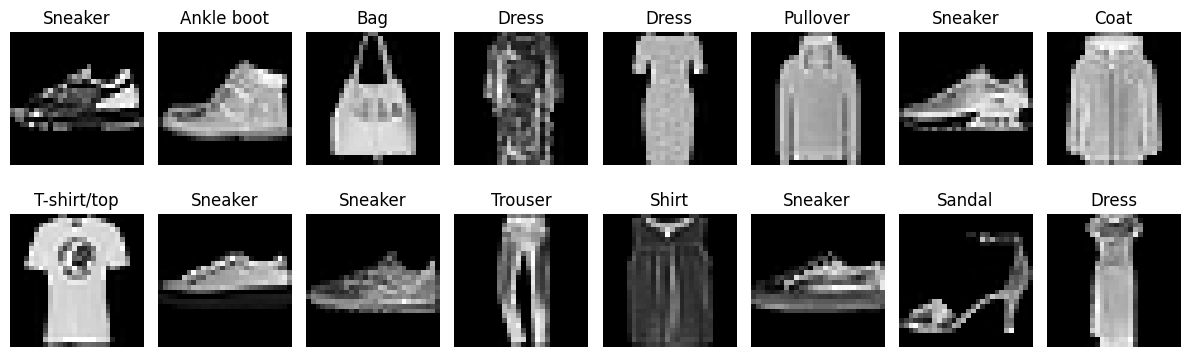

In [4]:
import matplotlib.pyplot as plt

data_iter = iter(train_loader)
images, labels = next(data_iter)

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


fig, axes = plt.subplots(2, 8, figsize=(12, 4))
axes = axes.flatten()

for i in range(16):
    img = images[i].squeeze()  # Usunięcie zbędnego wymiaru
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(classes[labels[i].item()])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


#**1.2**
**Dla co najmniej trzech architektur proszę wypisać macierz pomyłek i wykresy funkcji strat podczas uczenia.**

In [5]:
# Definicja trzech architektur CNN
class CNN_A(nn.Module):
    def __init__(self):
        super(CNN_A, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class CNN_B(nn.Module):
    def __init__(self):
        super(CNN_B, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class CNN_C(nn.Module):
    def __init__(self):
        super(CNN_C, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [6]:
# Funkcja do trenowania modeli i śledzenia strat
def train_and_evaluate(model, train_loader, test_loader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Ewaluacja na zbiorze testowym
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        test_losses.append(test_loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    return train_losses, test_losses, all_preds, all_labels



Training CNN_A...

Epoch 1/10, Training Loss: 0.4700, Test Loss: 0.3794
Epoch 2/10, Training Loss: 0.3110, Test Loss: 0.2835
Epoch 3/10, Training Loss: 0.2657, Test Loss: 0.2714
Epoch 4/10, Training Loss: 0.2337, Test Loss: 0.2513
Epoch 5/10, Training Loss: 0.2115, Test Loss: 0.2438
Epoch 6/10, Training Loss: 0.1886, Test Loss: 0.2468
Epoch 7/10, Training Loss: 0.1718, Test Loss: 0.2350
Epoch 8/10, Training Loss: 0.1560, Test Loss: 0.2440
Epoch 9/10, Training Loss: 0.1408, Test Loss: 0.2524
Epoch 10/10, Training Loss: 0.1258, Test Loss: 0.2512


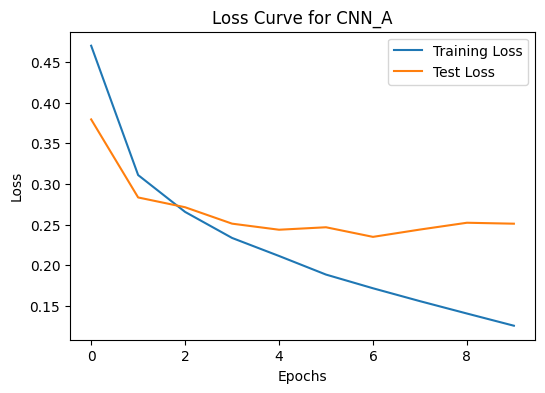


Training CNN_B...

Epoch 1/10, Training Loss: 0.5834, Test Loss: 0.3784
Epoch 2/10, Training Loss: 0.3582, Test Loss: 0.3178
Epoch 3/10, Training Loss: 0.3065, Test Loss: 0.2931
Epoch 4/10, Training Loss: 0.2746, Test Loss: 0.2700
Epoch 5/10, Training Loss: 0.2510, Test Loss: 0.2731
Epoch 6/10, Training Loss: 0.2331, Test Loss: 0.2618
Epoch 7/10, Training Loss: 0.2159, Test Loss: 0.2950
Epoch 8/10, Training Loss: 0.2039, Test Loss: 0.2557
Epoch 9/10, Training Loss: 0.1921, Test Loss: 0.2437
Epoch 10/10, Training Loss: 0.1783, Test Loss: 0.2548


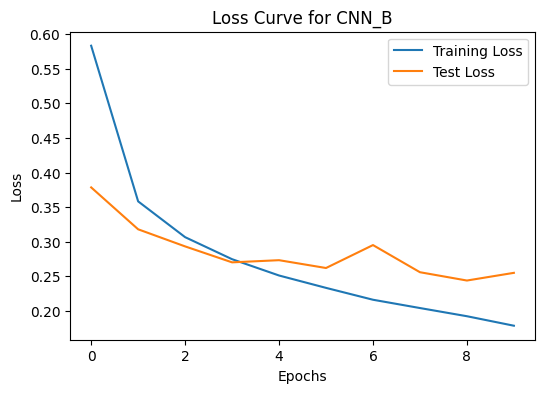


Training CNN_C...

Epoch 1/10, Training Loss: 0.4676, Test Loss: 0.3075
Epoch 2/10, Training Loss: 0.2869, Test Loss: 0.2709
Epoch 3/10, Training Loss: 0.2438, Test Loss: 0.2690
Epoch 4/10, Training Loss: 0.2109, Test Loss: 0.2516
Epoch 5/10, Training Loss: 0.1856, Test Loss: 0.2624
Epoch 6/10, Training Loss: 0.1624, Test Loss: 0.2407
Epoch 7/10, Training Loss: 0.1444, Test Loss: 0.2314
Epoch 8/10, Training Loss: 0.1276, Test Loss: 0.2363
Epoch 9/10, Training Loss: 0.1107, Test Loss: 0.2427
Epoch 10/10, Training Loss: 0.0971, Test Loss: 0.2764


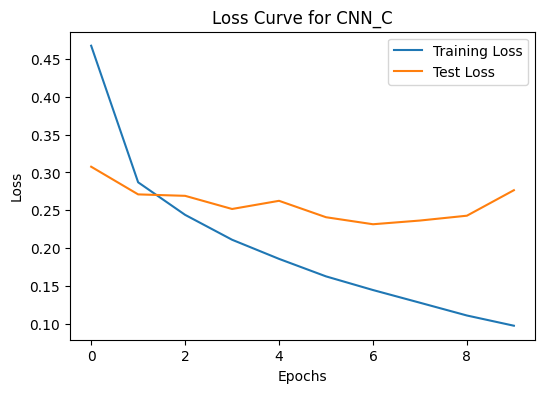

In [7]:
# Trenowanie modeli
models = {"CNN_A": CNN_A(), "CNN_B": CNN_B(), "CNN_C": CNN_C()}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...\n")
    train_losses, test_losses, preds, labels = train_and_evaluate(model, train_loader, test_loader, epochs=10)
    results[name] = (train_losses, test_losses, preds, labels)

    # Wykres strat
    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve for {name}")
    plt.legend()
    plt.show()


CNN_A

> Prosta, 2-warstwowa sieć z umiarkowaną liczbą filtrów i Dropout 0.25.
>
>Strata treningowa szybko malała, strata testowa ustabilizowała się po kilku epokach (w granicach wartości 0.24), co wskazuje na dobre dopasowanie i umiarkowane ryzyko przeuczenia.

CNN_B
> Sieć 3-warstwowa z większymi filtrami (kernel 5 w początkowych warstwach), Dropout 0.3.
>
>Mimo wyższej początkowej straty, model z czasem uzyskał stabilne wyniki testowe (w granicach 0.26), z delikatnym spadkiem przy końcu. Wykres odzwierciedla dobrą równowagę między złożonością a uogólnieniem.

CNN_C
>Najgłębsza sieć (3 warstwy konwolucyjne, więcej filtrów).
>
>Najlepsze wyniki na zbiorze testowym do epoki 7–8 (w granicach 0.24), ale końcowe epoki wskazują na możliwe przeuczenie (wzrost straty do 0.2764), co sugeruje zbyt dużą złożoność względem zbioru danych.

*Wszystkie modele osiągnęły zadowalające rezultaty.*

*CNN_C osiągnęła najniższą stratę testową, ale wykazuje objawy przeuczenia.*
*CNN_A i CNN_B są bardziej stabilne i potencjalnie lepiej uogólniające – szczególnie CNN_A jako prostsza i mniej podatna na nadmierne dopasowanie.*

---

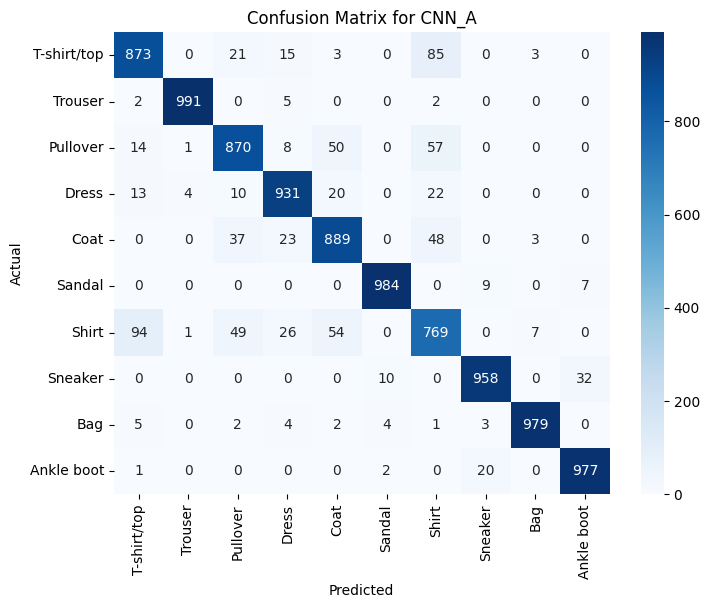

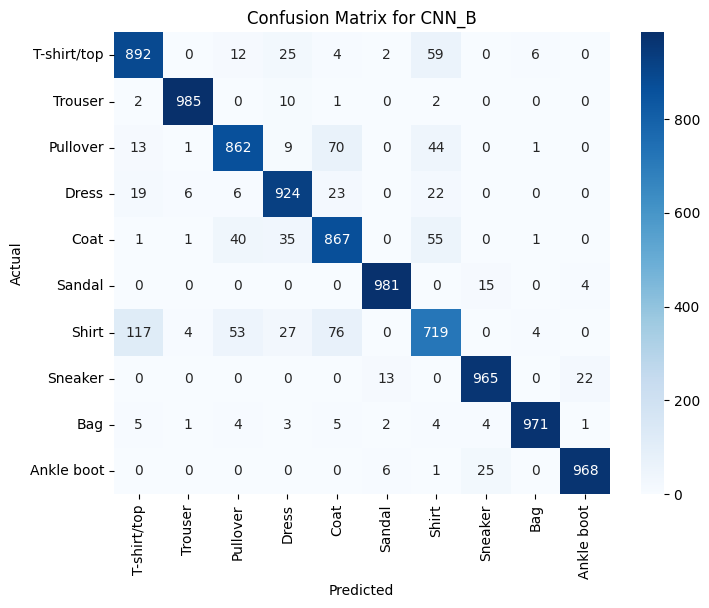

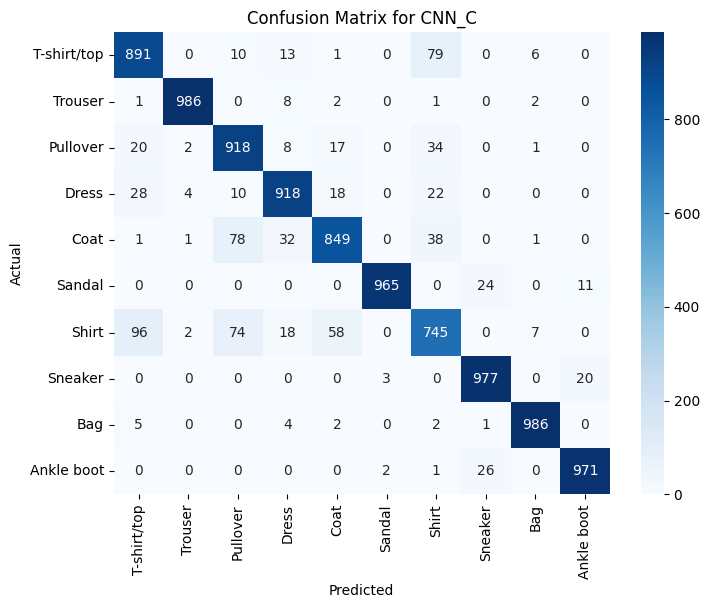

In [8]:
# Macierze pomyłek
for name, (train_losses, test_losses, preds, labels) in results.items():
    cm = confusion_matrix(labels, preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


CNN_A

>Wykres strat szybko zbiega do niskiej wartości (0.13), test loss stabilny od 4. epoki (0.24-0.25).
>
>Macierz pomyłek: Największe pomyłki między "Shirt" a "T-shirt/top", "Pullover", "Coat".
>
>Dobra ogólna skuteczność, ale myli podobne klasy odzieży górnej.

CNN_B
>Wykres strat posiada początkowo wyższe wartośći na osi loss, zbiega powoli; test loss jest niestabilny - wykres ukazuje lekkie przeuczenie.
>
>Macierz pomyłek: Więcej błędów niż CNN_A w klasach "Pullover", "Shirt", "Coat".
>
> Mimo że architektura jest głębsza, to jest mniej skuteczna; większy dropout nie wystarczył do kontroli występowanego przeuczenia.

CNN_C
>Wykres strat posiada najniższy train loss (0.09), ale test loss rośnie pod koniec — typowe przeuczenie.
>
>Macierz pomyłek: Pomimo głębokiej architektury posiada więcej błędów w "Pullover", "Coat", "Shirt".
>
>Bardzo dobra nauka, ale nadmiar parametrów prowadzi do przeuczenia przy tylko 10 epokach.

---

#**1.3**
**Proszę spróbować w każdym wypadku podać przynajmniej jeden źle zaklasyfikowany obrazek.**

Misclassified example for CNN_A:


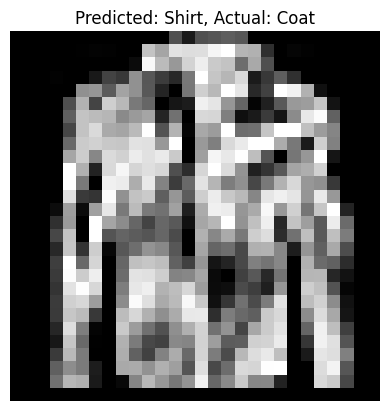

Misclassified example for CNN_B:


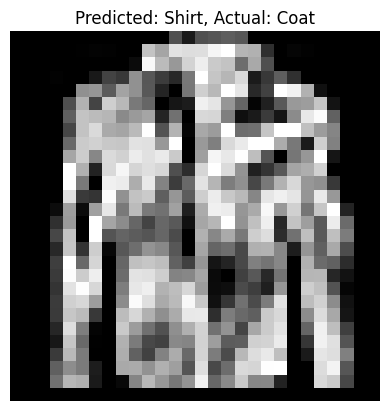

Misclassified example for CNN_C:


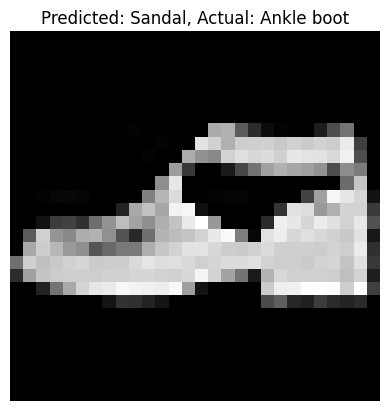

In [10]:
def show_misclassified(model, test_loader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            misclassified = (preds != labels)
            if misclassified.sum() > 0:
                idx = misclassified.nonzero(as_tuple=True)[0][0].item()
                img = images[idx].cpu().squeeze()

                plt.imshow(img, cmap="gray")
                plt.title(f"Predicted: {classes[preds[idx].item()]}, Actual: {classes[labels[idx].item()]}")
                plt.axis("off")
                plt.show()
                break

for name, model in models.items():
    print(f"Misclassified example for {name}:")
    show_misclassified(model, test_loader)


>*Dla każdej z architektur wyświetlono po jednym błędnie sklasyfikowanym obrazie ze zbioru testowego. Kod przeszukuje dane testowe do momentu napotkania pierwszego błędu klasyfikacji, po czym prezentuje go graficznie wraz z etykietą przewidzianą i rzeczywistą.*
>
>*Wyniki pokazują, że pomyłki dotyczą wizualnie podobnych kategorii ubrań.*

---
---

#**2**
**Dla jednej wybranej architektury, proszę porównać czas uczenia sieci na CPU i na GPU, do czego mogą Państwo wykorzystać własną kartę NVidii lub zasoby Colaba. W Runtime->Change Runtime Type musi być zaznaczona opcja "T4 GPU".**

In [11]:
import time

# Wybór architektury
model_class = CNN_B

# Funkcja trenująca / mierzenie czasu
def timed_training(model, train_loader, device, epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    total_time = time.time() - start_time
    return total_time

# Trenowanie na CPU
cpu_device = torch.device("cpu")
model_cpu = model_class()
time_cpu = timed_training(model_cpu, train_loader, cpu_device)
print(f"Czas trenowania na CPU: {time_cpu:.2f} sekund")

# Trenowanie na GPU
if torch.cuda.is_available():
    gpu_device = torch.device("cuda")
    model_gpu = model_class()
    time_gpu = timed_training(model_gpu, train_loader, gpu_device)
    print(f"Czas trenowania na GPU: {time_gpu:.2f} sekund")
else:
    print("GPU niedostępne.")


Czas trenowania na CPU: 229.85 sekund
Czas trenowania na GPU: 78.39 sekund


>Porównano czas trenowania architektury CNN_B na CPU i GPU. Wyniki pokazują wyraźną różnicę: trenowanie na CPU trwało 229.85 sekund, podczas gdy na GPU (T4 w Google Colab) tylko 78.39 sekund. Oznacza to ponad trzykrotne przyspieszenie dzięki użyciu GPU.
>
>Taki rezultat jest zgodny z oczekiwaniami, gdyż GPU są zoptymalizowane do równoległego przetwarzania dużych macierzy, co znacznie przyspieszyło obliczenia w głębokich sieciach neuronowych.

---
---